## Challenge - Time Series Analysis
1. Plot the time series, along with any logical or necessary differences to get a stationary dataset
2. Generate and interpret a PACF for the time series (and/or its differences)
3. Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
4. Choose one specification and make the case for that as a logical model for your dataset

In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
eth_price_raw = pd.read_csv('ethereum_price.csv')
eth_price_raw.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"
1,"Feb 19, 2018",921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000"
2,"Feb 18, 2018",973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000"
3,"Feb 17, 2018",944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000"
4,"Feb 16, 2018",934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000"


In [7]:
eth_price_raw.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
924,"Aug 11, 2015",0.708087,1.130000,0.663235,1.070000,"1,463,100","42,796,500"
925,"Aug 10, 2015",0.713989,0.729854,0.636546,0.708448,"405,283","43,130,000"
926,"Aug 09, 2015",0.706136,0.879810,0.629191,0.701897,"532,170","42,637,600"
927,"Aug 08, 2015",2.790000,2.800000,0.714725,0.753325,"674,188","167,911,000"
928,"Aug 07, 2015",2.830000,3.540000,2.520000,2.770000,"164,329",-


In [14]:
eth_price_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 7 columns):
Date          929 non-null object
Open          929 non-null float64
High          929 non-null float64
Low           929 non-null float64
Close         929 non-null float64
Volume        929 non-null object
Market Cap    929 non-null object
dtypes: float64(4), object(3)
memory usage: 50.9+ KB


In [22]:
eth_price = eth_price_raw[['Date', 'Close']].copy()
eth_price['Date'] = pd.to_datetime(eth_price['Date'], format='%b %d, %Y')
eth_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 2 columns):
Date     929 non-null datetime64[ns]
Close    929 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB


In [26]:
print(eth_price.head())
print('number of nulls: {}'.format(eth_price.isnull().any().sum()))

        Date   Close
0 2018-02-20  895.37
1 2018-02-19  943.87
2 2018-02-18  923.92
3 2018-02-17  974.12
4 2018-02-16  944.21
number of nulls: 0


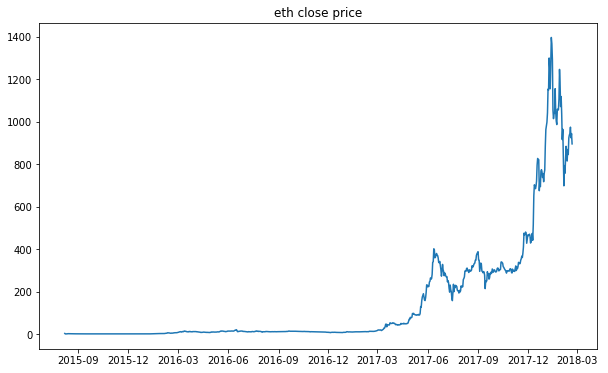

In [38]:
plt.figure(figsize=(10,6))
plt.plot(eth_price['Date'], eth_price['Close'])
plt.title('eth close price')
plt.show()

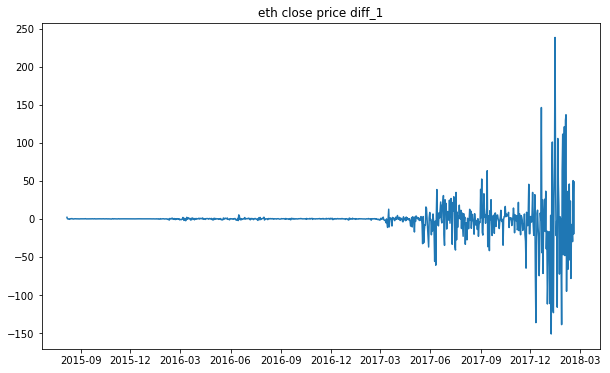

In [39]:
eth_price['diff_1'] = eth_price.Close - eth_price.Close.shift()
plt.figure(figsize=(10,6))
plt.plot(eth_price['Date'], eth_price['diff_1'])
plt.title('eth close price diff_1')
plt.show()

In [51]:
print(np.mean(eth_price['diff_1'][50:100]))
print(np.mean(eth_price['diff_1'][700:800]))

-11.354399999999998
-0.11426978


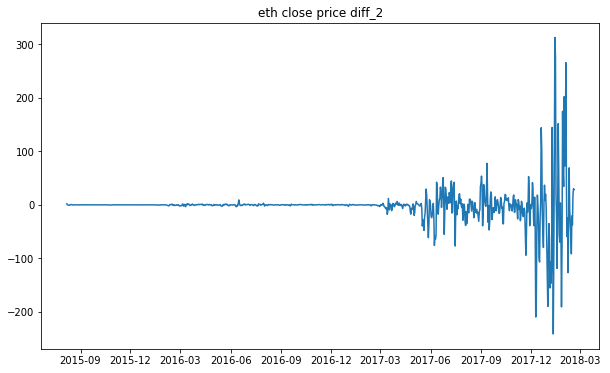

In [49]:
eth_price['diff_2'] = eth_price.Close - eth_price.Close.shift(2)
plt.figure(figsize=(10,6))
plt.plot(eth_price['Date'], eth_price['diff_2'])
plt.title('eth close price diff_2')
plt.show()

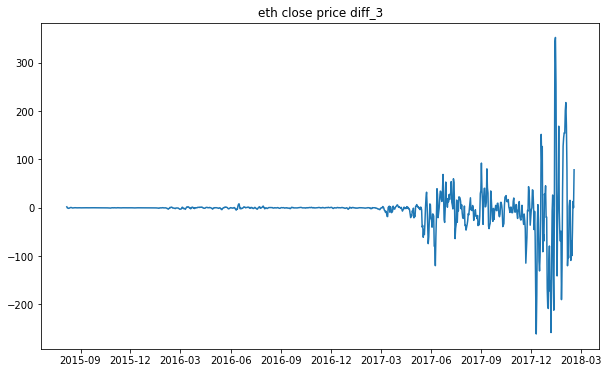

In [50]:
eth_price['diff_3'] = eth_price.Close - eth_price.Close.shift(3)
plt.figure(figsize=(10,6))
plt.plot(eth_price['Date'], eth_price['diff_3'])
plt.title('eth close price diff_3')
plt.show()

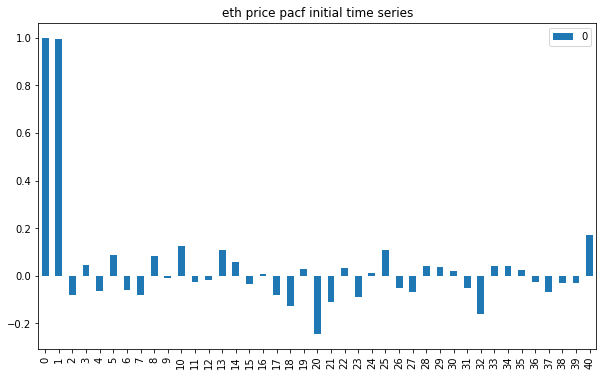

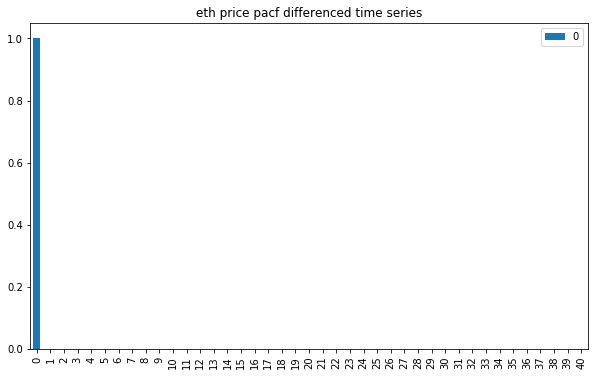

In [48]:
from statsmodels.tsa.stattools import pacf
x_acf_close = pd.DataFrame(pacf(eth_price.Close))
x_acf_diff_1 = pd.DataFrame(pacf(eth_price.diff_1))

x_acf_close.plot(kind='bar', figsize=(10,6))
plt.title('eth price pacf initial time series')
plt.show()

x_acf_diff_1.plot(kind='bar', figsize=(10,6))
plt.title('eth price pacf differenced time series')
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA